# Frontend for data warehouse architecture case study

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

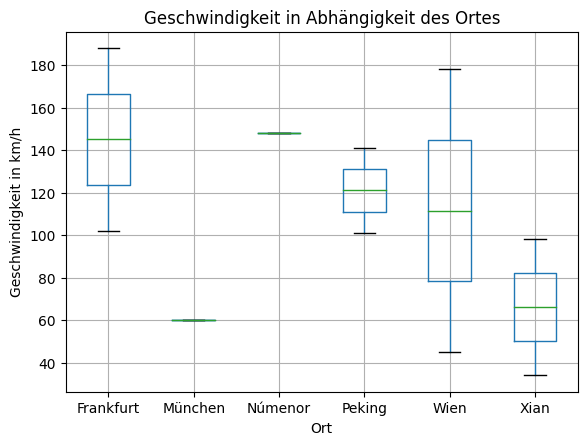

<Figure size 640x480 with 0 Axes>

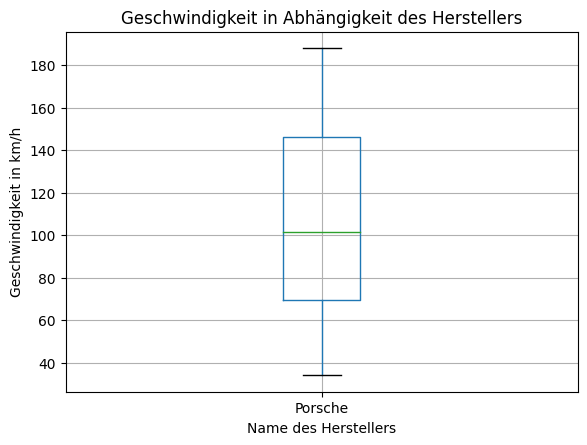

<Figure size 640x480 with 0 Axes>

In [13]:
# Credentials for postgres database
user = "postgres"
password = "123456"
host = "localhost"
port = "5432"
dbname = "staging"

# Connect to postgres database
with create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{dbname}').connect() as conn:
    # Speed vs. Location
    sql_location = "SELECT geschwindigkeit, ort FROM staging.f_messung_view mv INNER JOIN staging.d_ort_table ot ON mv.d_ort_messung_key = ot.d_ort_key;"
    # Plot the data
    pd.read_sql_query(sql_location, conn).boxplot(by="ort")
    plt.suptitle("")
    plt.ylabel("Geschwindigkeit in km/h")
    plt.xlabel("Ort")
    plt.title("Geschwindigkeit in Abhängigkeit des Ortes")
    # Show and save image
    plt.show()
    plt.savefig("frontend_location.png")

    # Speed vs. Manufacturer
    sql_location = "SELECT geschwindigkeit, hersteller FROM staging.f_messung_view mv INNER JOIN staging.d_fahrzeug_incremental fi ON mv.d_fahrzeug_key = fi.d_fahrzeug_key;"
    # Plot the data
    pd.read_sql_query(sql_location, conn).boxplot(by="hersteller")
    plt.suptitle("")
    plt.ylabel("Geschwindigkeit in km/h")
    plt.xlabel("Name des Herstellers")
    plt.title("Geschwindigkeit in Abhängigkeit des Herstellers")
    # Show and save image
    plt.show()
    plt.savefig("frontend_manufacturer.png")
